## Digital Processing Image
### Ulilé

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Crop and flip an image


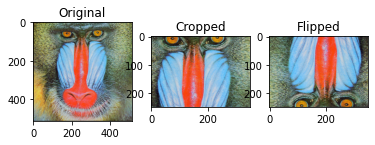

In [ ]:
img = plt.imread('baboon.png')

x = 100
y = 50
w = 350
h = 250

img_cropped = img[y:y+h, x:x+w]

img_flipped = np.flipud(np.fliplr(img_cropped))

plt.subplot(131)
plt.imshow(img)
plt.title('Original')

plt.subplot(132)
plt.imshow(img_cropped)
plt.title('Cropped')

plt.subplot(133)
plt.imshow(img_flipped)
plt.title('Flipped')
plt.show()


Implement image translation using Numpy and OpenCV.


In [ ]:
img = plt.imread('baboon.png')

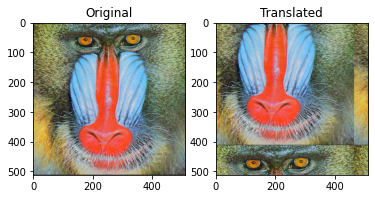

In [ ]:
tx = 50
ty = 100

img_tr = np.zeros_like(img)

rows, cols, _ = img.shape
idx_rows = np.arange(rows)
idx_cols = np.arange(cols)

img_tr[(idx_rows - ty)[:, np.newaxis], idx_cols - tx] = img[idx_rows[:, np.newaxis], idx_cols]

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.subplot(122)
plt.imshow(img_tr)
plt.title('Translated')
plt.show()

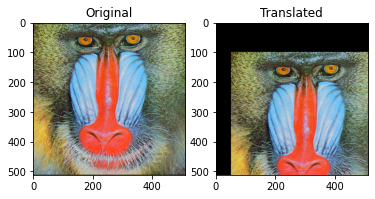

In [ ]:
img = cv2.imread('baboon.png')

tx = 50
ty = 100

M = np.float32([[1, 0, tx], [0, 1, ty]])

img_translated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_translated, cv2.COLOR_BGR2RGB))
plt.title('Translated')
plt.show()


Implement image rotation using Numpy and OpenCV.


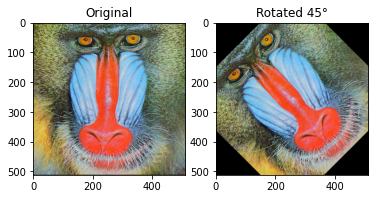

In [ ]:
from operator import index
img = plt.imread('baboon.png')
angle = 45

theta = np.radians(angle)
cos, sin = np.cos(theta), np.sin(theta)

rot_mat = np.array([[cos, -sin],
                            [sin, cos]])

img_rotated = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        x, y = np.dot(rot_mat, [j - img.shape[1] / 2, i - img.shape[0] / 2])
        x += img.shape[1] / 2
        y += img.shape[0] / 2
        if x >= 0 and x < img.shape[1] and y >= 0 and y < img.shape[0]:
            img_rotated[i, j, :] = img[int(y), int(x), :]

# Plot the original and rotated images
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(img_rotated)
plt.title('Rotated 45°')
plt.show()



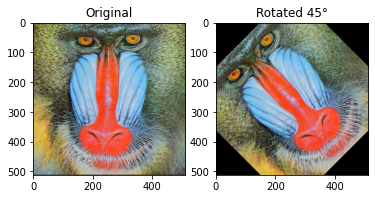

In [ ]:
img = cv2.imread('baboon.png')

angle = 45

h, w, _ = img.shape
cx, cy = w // 2, h // 2

M = cv2.getRotationMatrix2D((cx, cy), angle, 1)

img_rotated = cv2.warpAffine(img, M, (w, h))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated 45°')
plt.show()


In [ ]:
from google.colab.patches import cv2_imshow

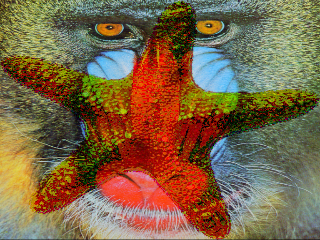

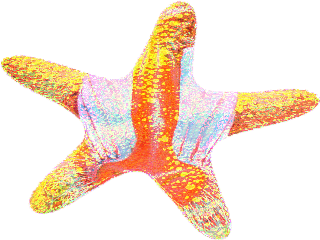

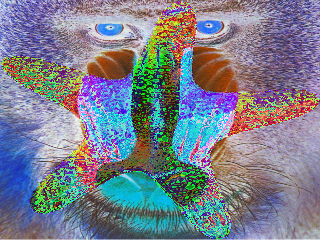

In [ ]:
img1 = cv2.imread("baboon.png")
img2 = cv2.imread("StarFishOnlyRGB.png")

img1 = cv2.resize(img1, (320, 240))
img2 = cv2.resize(img2, (320, 240))

mask = np.zeros_like(img1)
mask[200:400, 200:400] = 255

bit_and = cv2.bitwise_and(img2, img1, mask=None)
bit_or = cv2.bitwise_or(img1, img2, mask=None)
bit_xor = cv2.bitwise_xor(img1, img2, mask=None)

cv2_imshow(bit_and)
cv2_imshow(bit_or)
cv2_imshow(bit_xor)